# Using the Requests module 

NASA makes tons of data publicly available, including the Astronomy Picture of the Day (APOD). To get the picture you need to issue an HTTP Get request and parse the JSON that returns. This task is made easier with the Requests module.

In [1]:
import requests

Using the Requests module is very easy. For example, NASA gives us an example URL with a demo security key that can be used to query the interface. Normally, the request url would look like:
```
https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY
```
Everything after the '?' is a variable and its associated value. In this case, NASA expects a variable called "api_key" which we supply with the value "DEMO_VALUE." 

Many times these variables (or 'parameters') will come from user input and so should not be hard-coded. Below is an example of making a request, with the parameter contained in a dictionary variable:

In [2]:
apiKey = {'api_key':'DEMO_KEY'}
r =  requests.get('https://api.nasa.gov/planetary/apod',params=apiKey)

We can look at the URL that is generated from that request:

In [18]:
print(r.url)

https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY


We can look at what was returned:

In [3]:
print(r.text)

{
  "copyright": "NASA",
  "date": "2016-01-29",
  "explanation": "Giant elliptical galaxy M60 and spiral galaxy NGC 4647 do look like an odd couple in this sharp cosmic portrait from the Hubble Space Telescope. But they are found in a region of space where galaxies tend to gather, on the eastern side of the nearby Virgo Galaxy Cluster. About 54 million light-years distant, bright M60's simpler egg-like shape is created by its randomly swarming older stars, while NGC 4647's young blue stars, gas and dust are organized into winding arms rotating in a flattened disk. Spiral NGC 4647 is estimated to be more distant than M60, some 63 million light-years away. Also known as Arp 116, the pair of galaxies may be on the verge of a significant gravitational encounter, though. M60 (aka NGC 4649) is about 120,000 light-years across. The smaller NGC 4647 spans around 90,000 light-years, about the size of our own Milky Way.",
  "hdurl": "http://apod.nasa.gov/apod/image/1601/M60HST_large.jpg",
  "me

This looks to be JSON data. Requests can handle JSON data by calling a json() function:

In [21]:
r.json()

{'date': '2016-01-24',
 'explanation': 'In the center of star-forming region 30 Doradus lies a huge cluster containing some of the largest, hottest, and most massive stars known. These stars, known collectively as star cluster R136, were captured in the featured image in visible light by the Wide Field Camera 3 in 2009 peering through the Hubble Space Telescope. Gas and dust clouds in 30 Doradus, also known as the Tarantula Nebula, have been sculpted into elongated shapes by powerful winds and ultraviolet radiation from these hot cluster stars.  The 30 Doradus Nebula lies within a neighboring galaxy known as the Large Magellanic Cloud and is located a mere 170,000 light-years away.',
 'hdurl': 'http://apod.nasa.gov/apod/image/1601/30dor_hubble_3939.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'Star Cluster R136 Bursts Out',
 'url': 'http://apod.nasa.gov/apod/image/1601/30dor_hubble_960.jpg'}

But we would really like to be able to use this data in a meaningful way. Fortunately, JSON data can go straight into a dictionary with no translation:

In [23]:
d = r.json()

In [24]:
d['date']

'2016-01-24'

In [35]:
d['explanation']

'In the center of star-forming region 30 Doradus lies a huge cluster containing some of the largest, hottest, and most massive stars known. These stars, known collectively as star cluster R136, were captured in the featured image in visible light by the Wide Field Camera 3 in 2009 peering through the Hubble Space Telescope. Gas and dust clouds in 30 Doradus, also known as the Tarantula Nebula, have been sculpted into elongated shapes by powerful winds and ultraviolet radiation from these hot cluster stars.  The 30 Doradus Nebula lies within a neighboring galaxy known as the Large Magellanic Cloud and is located a mere 170,000 light-years away.'

We can use the 'url' entry to get the picture. Note that the **Image(d['url'])** function is used in the Jupyter Notebook. Command-line Python would do something different.

from IPython.display import Image
from IPython.core.display import HTML 
Image(d['url'])

NASA gives us a few other variables to play with:

QUERY PARAMETERS

|Parameter|Type|Default|Description|
|---------|----|-------|-----------|
|date	|YYYY-MM-DD	|today|	The date of the APOD image to retrieve|
|hd|	bool|	False|	Retrieve the URL for the high resolution image|
|api_key|	string|	DEMO_KEY|	api.nasa.gov key for expanded usage|

Let's try using the **datetime** module to get different pictures.

In [8]:
import datetime
now = datetime.datetime.now()
print(now.date())

2016-01-28


To get a different day / week / month, etc. we can use the timedelta() function:

In [9]:
yesterday = now - datetime.timedelta(days = 1)
print(yesterday.date())

2016-01-27


So, to get yesterday's picture:

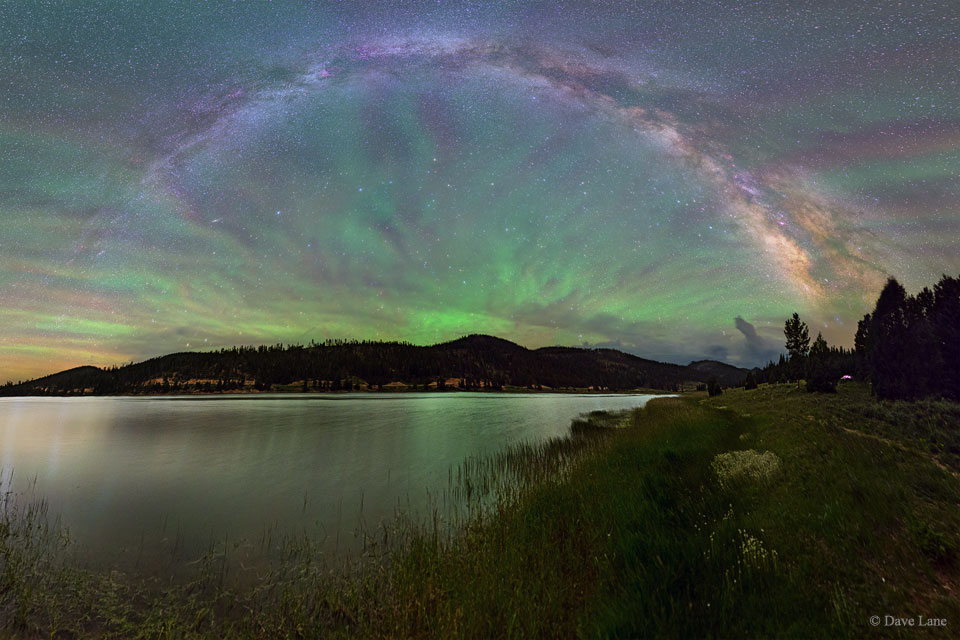

In [11]:
from IPython.display import Image
data = {'api_key':'DEMO_KEY', 'date':yesterday.date()}
r =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
d = r.json()
Image(d['url'])

Now, how about we ask the user for a date?

In [12]:
myDate = input("Enter a past date in YYYY-MM-DD format: ")

# Assuming we got the right format, we can use split() with the dashes ("-") to get the numbers

myYear, myMonth, myDay = myDate.split('-')

Enter a past date in YYYY-MM-DD format: 2015-12-23


Now we make a **date** object from the input:

In [13]:
picDate = datetime.date(int(myYear), int(myMonth), int(myDay))

And then use it just like above:

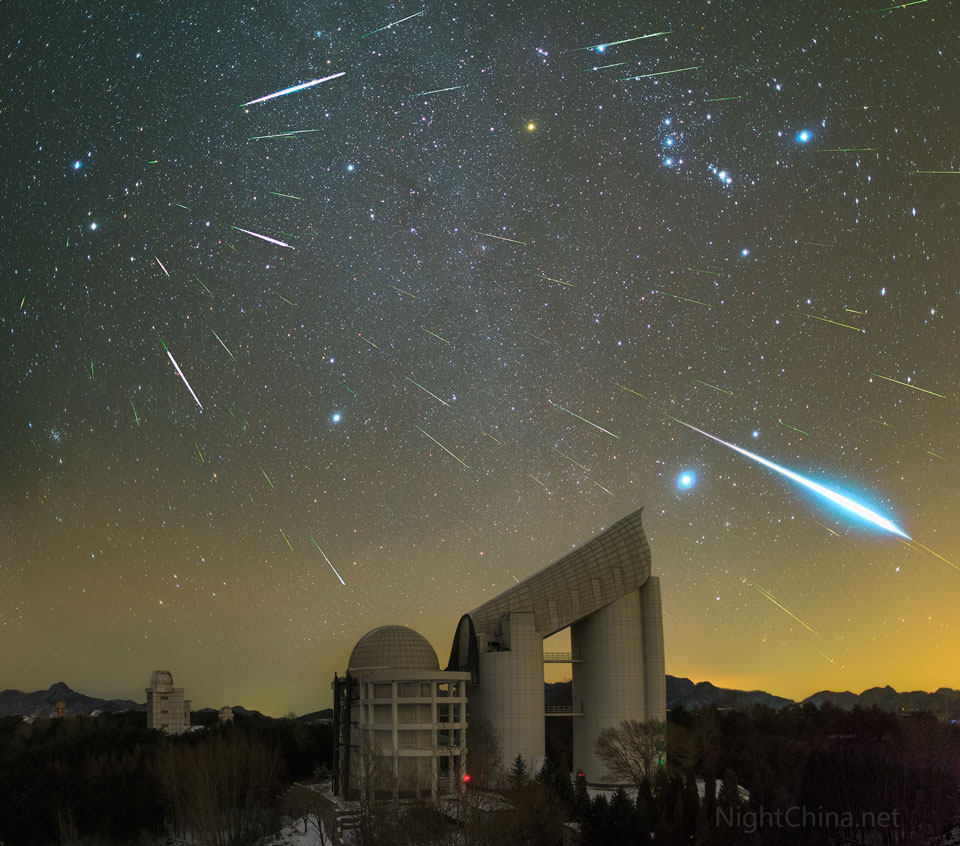

In [14]:
data = {'api_key':'DEMO_KEY', 'date':picDate}
r =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
d = r.json()
Image(d['url'])